# Case Study 12: Cyber Security – Network Security: Network Intrusions Detection Case Study

# Questions
## What is the difference between
- Data_of_Attack_Back_Normal.csv with shape = (576710, 42)
- Data_of_Attack_Back.csv with shape = (968, 42)

- If I use Data_of_Attack_Back.csv to predict. I find two threats row number 587110 and 587111
- Also for binomial model following features give the best result -
Index(['protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes',
       'logged_in', 'count', 'serror_rate', 'srv_error_rate', 'rerror_rate',
       'same_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate'],
      dtype='object')
- rest are not needed

## Setup

In [1]:
%ls data/

Cyber Security - Network Intrusion Case Study_new.pdf
Data_of_Attack_Back.csv
Data_of_Attack_Back_BufferOverflow.csv
Data_of_Attack_Back_FTPWrite.csv
Data_of_Attack_Back_GuessPassword.csv
Data_of_Attack_Back_NMap.csv
Data_of_Attack_Back_Neptune.csv
Data_of_Attack_Back_Normal.csv
Data_of_Attack_Back_PortSweep.csv
Data_of_Attack_Back_RootKit.csv
Data_of_Attack_Back_Satan.csv
Data_of_Attack_Back_Smurf.csv


In [2]:
import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce
from plotnine import ggplot, aes, geom_bar, facet_wrap, theme, element_text, geom_histogram,ggtitle
pd.set_option('display.max_columns', None)

## import files

In [3]:
files = os.listdir(path="data/")
files = [file for file in files if file.endswith(".csv")]
column_sets = []
dfs = {}
for file in files:
    if not file == 'Data_of_Attack_Back_FTPWrite.csv':
        file_i = pd.read_csv(f'data/{file}')
        file_i.columns = file_i.columns.str.strip().str.lower()
        filename = re.sub(r'^Data_of_Attack_|\.csv$', '', file)
        ## file_i = file_i.apply(pd.to_numeric, errors='coerce')
        file_i['filename'] = filename
        print(f'{filename} has shape {file_i.shape} and columns={file_i.columns}')
        dfs[filename] = file_i
        column_sets.extend(file_i.columns.to_list())

set(column_sets)

Back_BufferOverflow has shape (30, 42) and columns=Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_error_rate',
       'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'filename'],
      dtype='object')
Back_NMap has shape (1554, 42) and columns=Index(['duration', 'protocol_type', 'service', 'flag', 'src_

{'count',
 'diff_srv_rate',
 'dst_bytes',
 'dst_host_count',
 'dst_host_diff_srv_rate',
 'dst_host_rerror_rate',
 'dst_host_same_src_port_rate',
 'dst_host_same_srv_rate',
 'dst_host_serror_rate',
 'dst_host_srv_count',
 'dst_host_srv_diff_host_rate',
 'dst_host_srv_rerror_rate',
 'dst_host_srv_serror_rate',
 'duration',
 'filename',
 'flag',
 'hot',
 'is_guest_login',
 'is_host_login',
 'land',
 'logged_in',
 'num_access_files',
 'num_compromised',
 'num_failed_logins',
 'num_file_creations',
 'num_outbound_cmds',
 'num_root',
 'num_shells',
 'protocol_type',
 'rerror_rate',
 'root_shell',
 'same_srv_rate',
 'serror_rate',
 'service',
 'src_bytes',
 'srv_count',
 'srv_diff_host_rate',
 'srv_error_rate',
 'srv_rerror_rate',
 'su_attempted',
 'urgent',
 'wrong_fragment'}

_data/Data_of_Attack_Back_FTPWrite.csv has 42 columns but is missing column headers._  
It is not perfect solution but I will give it the common_columns headers..

In [4]:
colnames = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes','dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell','su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login','is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_error_rate',
       'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate','srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate','dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate','dst_host_rerror_rate', 'dst_host_srv_rerror_rate']

FTPWrite = pd.read_csv('data/Data_of_Attack_Back_FTPWrite.csv', header=None, names = colnames)
FTPWrite.columns = FTPWrite.columns.str.strip().str.lower()
## FTPWrite = FTPWrite.apply(pd.to_numeric, errors='coerce')
filename = re.sub(r'^Data_of_Attack_|\.csv$', '', file)
FTPWrite['filename'] = filename
print(FTPWrite.shape)


combined_df = pd.concat(dfs.values(), ignore_index=True)

combined_df.shape

(8, 42)


(817543, 42)

In [5]:
combined_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_error_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,filename
0,0.0184,0.0,0.05,0.0,0.01511,0.02957,0,0.0,0.0,0.3,0.0,0.1,0.2,0.1,0.0,0.0,0.1,0.0,0.0,0,0.0,0.0,0.001,0.001,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.001,0.003,0.1,0.0,0.10,0.067,0.0,0.0,0.0,0.0,Back_BufferOverflow
1,0.0305,0.0,0.05,0.0,0.01735,0.02766,0,0.0,0.0,0.3,0.0,0.1,0.2,0.1,0.0,0.0,0.1,0.0,0.0,0,0.0,0.0,0.001,0.001,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.002,0.004,0.1,0.0,0.05,0.050,0.0,0.0,0.0,0.0,Back_BufferOverflow
2,0.0150,0.0,0.05,0.0,0.01587,0.06707,0,0.0,0.0,0.1,0.0,0.1,0.3,0.0,0.0,0.1,0.1,0.0,0.0,0,0.0,0.0,0.001,0.001,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.001,0.001,0.1,0.0,0.10,0.000,0.0,0.0,0.0,0.0,Back_BufferOverflow
3,0.0060,0.0,0.05,0.0,0.02328,0.04551,0,0.0,0.0,0.3,0.0,0.1,0.1,0.1,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.001,0.001,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.001,0.001,0.1,0.0,0.10,0.000,0.0,0.0,0.0,0.0,Back_BufferOverflow
4,0.0158,0.0,0.05,0.0,0.01567,0.03095,0,0.0,0.0,0.3,0.0,0.1,0.4,0.1,0.0,0.0,0.1,0.0,0.0,0,0.0,0.0,0.001,0.001,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.002,0.002,0.1,0.0,0.05,0.000,0.0,0.0,0.0,0.0,Back_BufferOverflow


In [6]:
rows_with_nan = combined_df[combined_df.isna().any(axis=1)]
rows_with_nan

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_error_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,filename


# Data Preprocessing
- Binary classification for attack or no_attack
- attack variable
- for binary classification use entire data
- for multinomial classification balance the data

In [7]:
def plot_vars(var='dst_host_srv_serror_rate', df=combined_df):
    plot = (
        ggplot(df, aes(x=var)) +
        geom_histogram(bins=30) +
        facet_wrap('~filename', ncol=5, scales='free')+
        theme(axis_text_y=element_text(angle=90), figure_size= (14,8))+
        ggtitle(f'col = {var}')
    )
    plot.show()

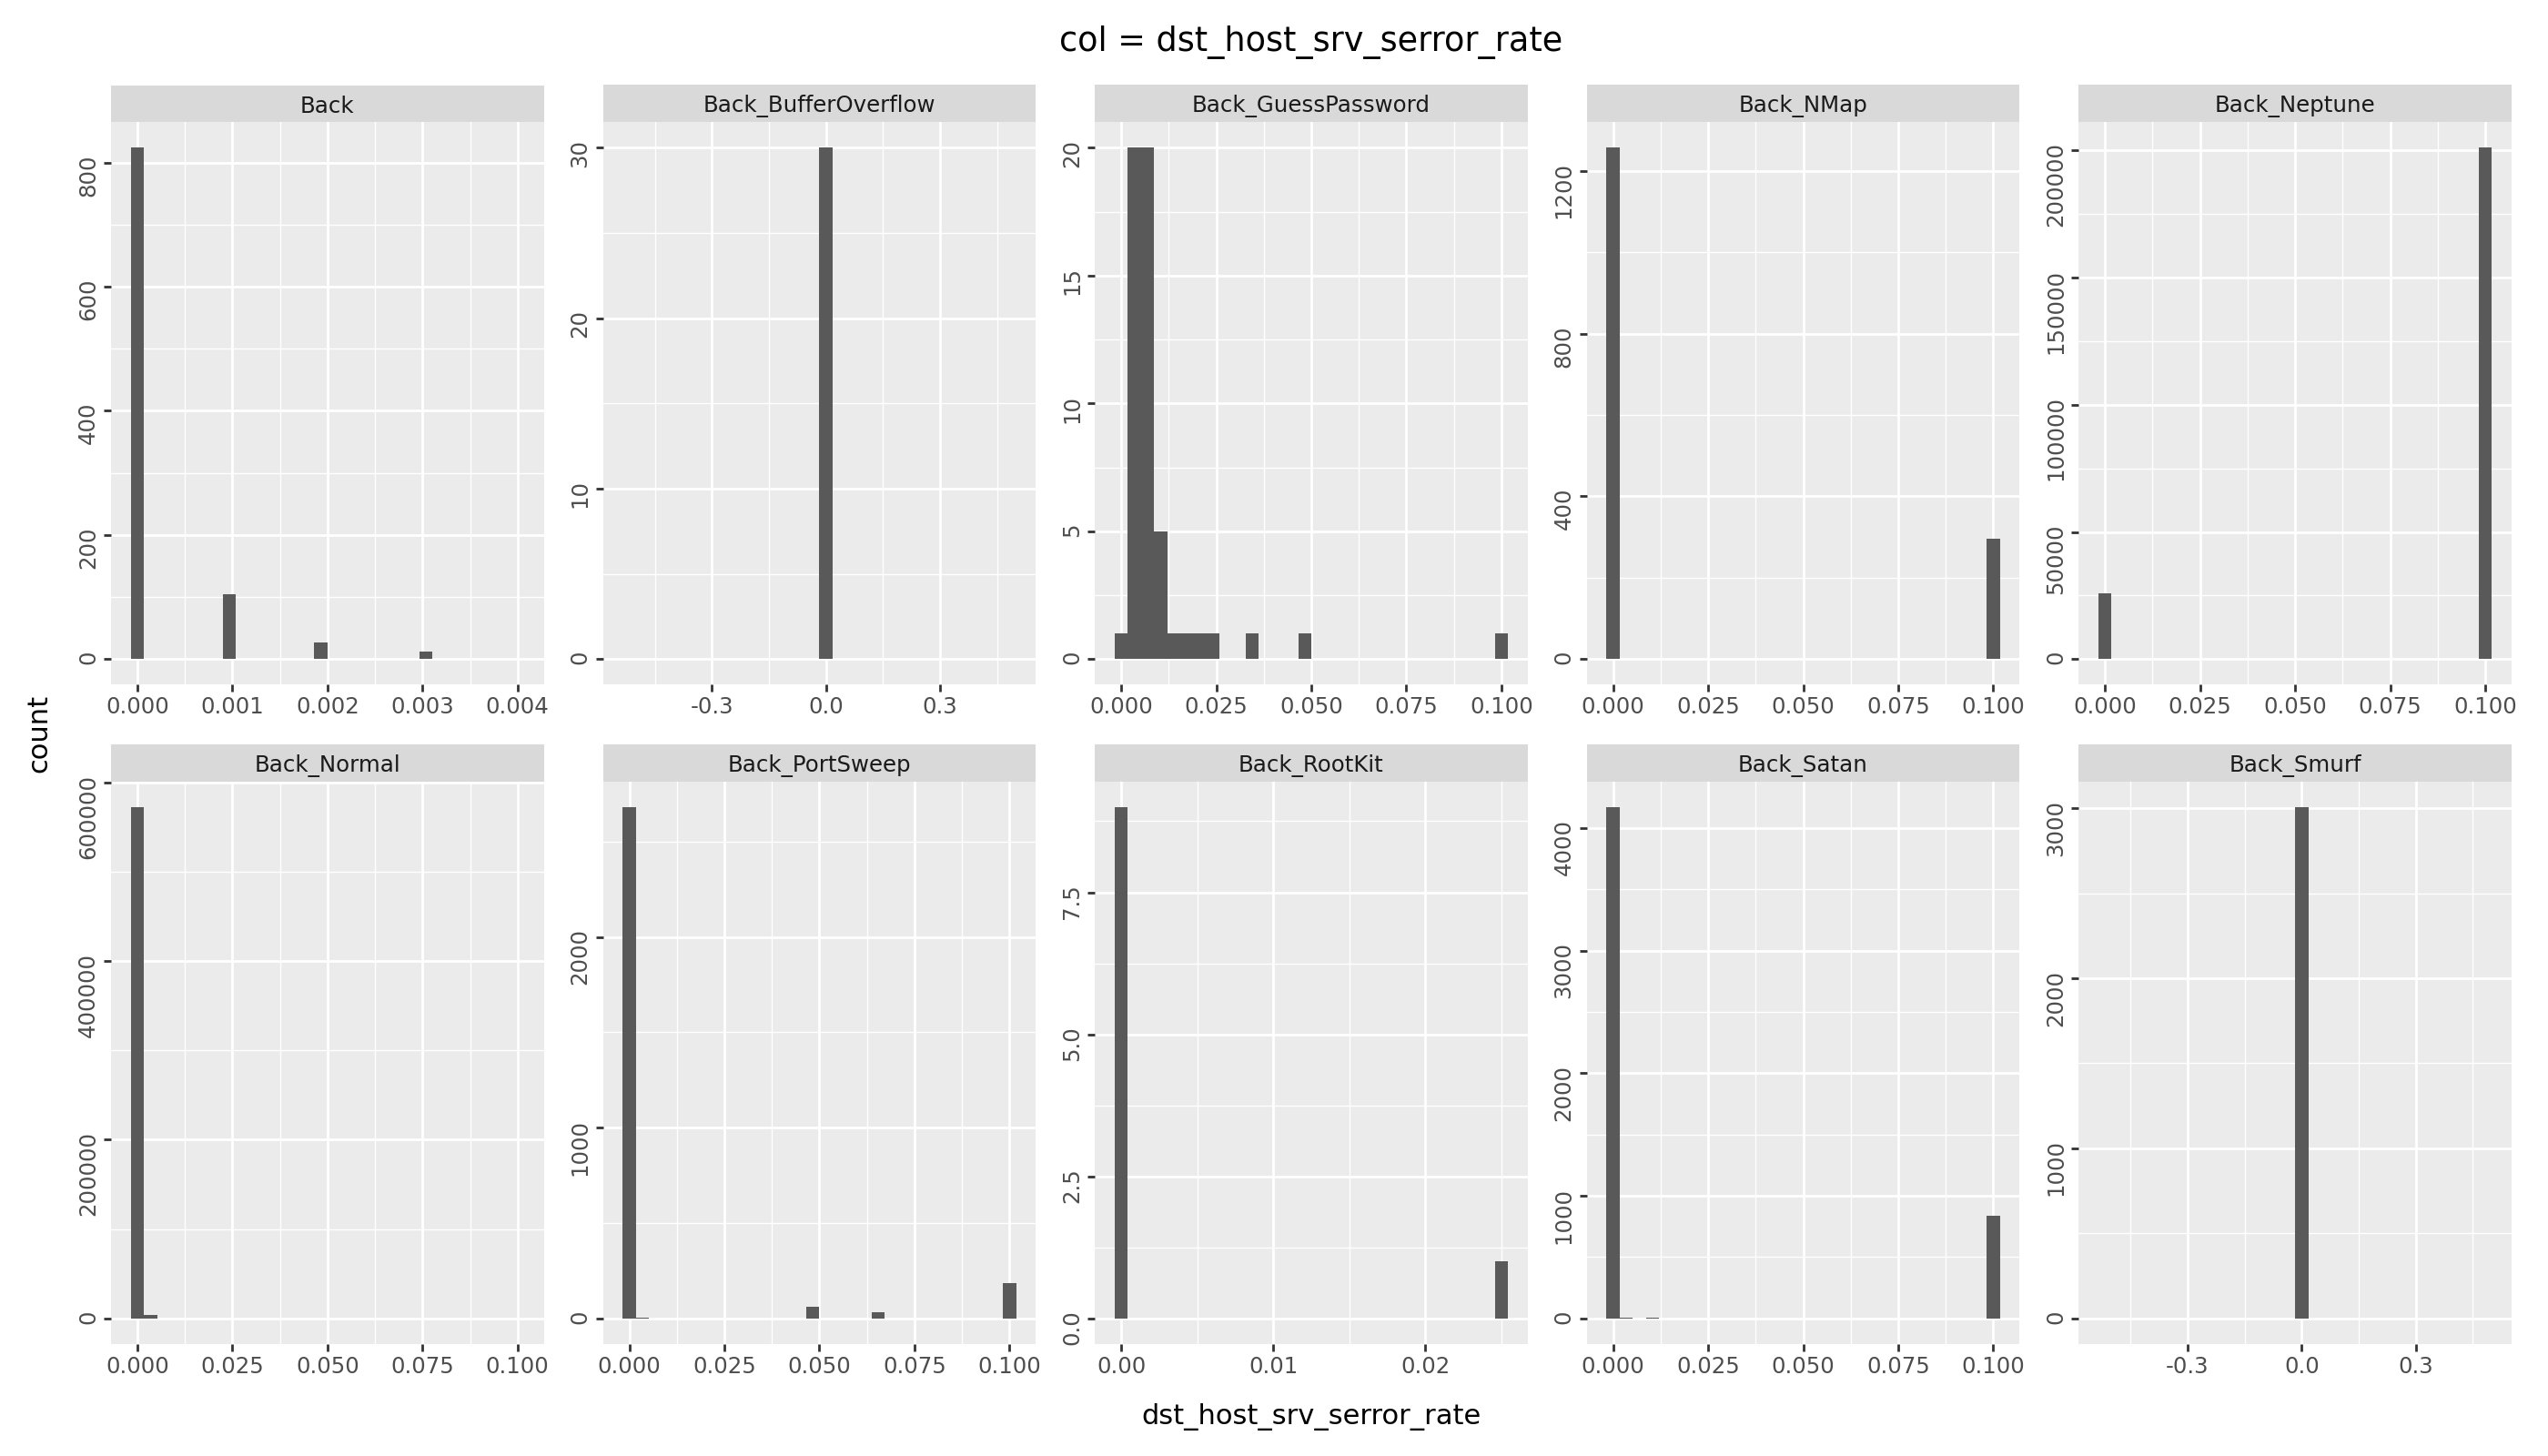

In [8]:
plot_vars('dst_host_srv_serror_rate')

In [9]:
## for col in combined_df.columns.to_list():
##    if col != 'filename':
##        plot_vars(col)

# I think "Data_of_Attack_Back" has the 968 rows that need prediction

In [10]:
combined_df['filename'] = np.where(combined_df['filename'] == 'Back', 'test_case', combined_df['filename'].str.replace('Back_',''))
combined_df['filename'].value_counts(dropna=False)

filename
Normal            576710
Neptune           227228
Satan               5019
Smurf               3007
PortSweep           2964
NMap                1554
test_case            968
GuessPassword         53
BufferOverflow        30
RootKit               10
Name: count, dtype: int64

In [11]:
assignment_data = combined_df[combined_df['filename'] == "test_case"]
model_data = combined_df[combined_df['filename'] != "test_case"].reset_index()

In [12]:
## for binomial Classification

In [13]:
## for binomial testing
model_data['is_attack'] = np.where(model_data['filename'] == 'Normal', 0, 1)
model_data.columns

Index(['index', 'duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_error_rate',
       'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'filename',
       'is_attack'],
      dtype='object')

In [14]:

## scale variables
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X = model_data.drop(columns=['is_attack','filename','index'])
X.shape
scaler_fn = ss.fit(X)
X_scaled = scaler_fn.transform(X)


y = model_data['is_attack']

In [15]:
%%script false --no-raise-error
import statsmodels.api as sm
binomial_model = sm.Logit(y, X_scaled)
result = binomial_model.fit(maxiter=1000)
print(result.summary2())
## does not converge

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, roc_curve, auc
logreg = LogisticRegression() ## add class_weight = 'balanced' ## if the classes are not balanced
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
logit_roc_auc = roc_auc_score(y_test, y_pred)
print(classification_report(y_test, y_pred))
print(f"The area under the curve is: {logit_roc_auc:0.3f}")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    115267
           1       1.00      0.99      0.99     48048

    accuracy                           1.00    163315
   macro avg       1.00      1.00      1.00    163315
weighted avg       1.00      1.00      1.00    163315

The area under the curve is: 0.995


In [18]:
##confusion_matrix(y_test, y_pred)
TP, FP, FN, TN = confusion_matrix(y_test, y_pred).ravel()
print(f'\n True Positive={TP:0.0f}\t False Positive = {FP:0.0f}\n False Negative = {FN:0.0f}\t True Negative = {TN:0.0f}')


 True Positive=115128	 False Positive = 139
 False Negative = 402	 True Negative = 47646


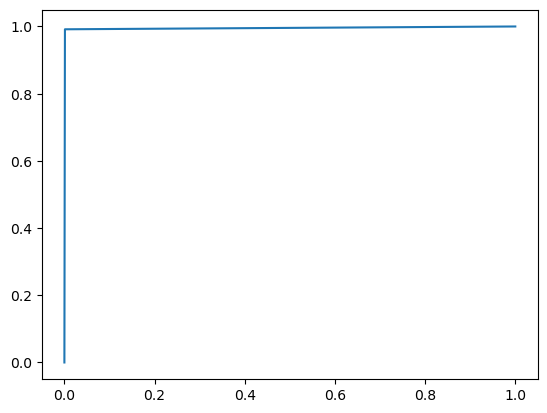

In [19]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr)
plt.show()

In [20]:
## lets try recursive feature elimination
from sklearn.feature_selection import RFE

rfe = RFE(logreg)
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)
select_cols = X_train.columns[rfe.support_]

print("\n The selected features are: ")
print(f'Selected columns: {list(select_cols)}, n={len(select_cols)}')

[False  True  True  True  True  True False False False False False  True
 False False False False False False False False False False  True False
  True  True  True False  True False  True  True  True False  True  True
 False  True  True  True  True]

 The selected features are: 
Selected columns: ['protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'logged_in', 'count', 'serror_rate', 'srv_error_rate', 'rerror_rate', 'same_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate'], n=20


In [21]:
print("\n The following features are not important: ")
columns_not_important = list(X_train.columns[~rfe.support_])
print(f'Columns selected against: {columns_not_important}, n={len(columns_not_important)}')


 The following features are not important: 
Columns selected against: ['duration', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'srv_count', 'srv_rerror_rate', 'diff_srv_rate', 'dst_host_same_srv_rate', 'dst_host_srv_diff_host_rate'], n=21


In [22]:
X_train = X_train[select_cols]
X_train.columns

Index(['protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes',
       'logged_in', 'count', 'serror_rate', 'srv_error_rate', 'rerror_rate',
       'same_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate'],
      dtype='object')

In [23]:
logreg_SF = LogisticRegression() ## add class_weight = 'balanced' ## if the classes are not balanced
logreg_SF.fit(X_train, y_train)
y_pred = logreg_SF.predict(X_test[select_cols])
logit_roc_auc = roc_auc_score(y_test, y_pred)
print(classification_report(y_test, y_pred))
print(f"The area under the curve is: {logit_roc_auc:0.3f}")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    115267
           1       1.00      0.99      0.99     48048

    accuracy                           1.00    163315
   macro avg       1.00      1.00      1.00    163315
weighted avg       1.00      1.00      1.00    163315

The area under the curve is: 0.995


In [24]:
##confusion_matrix(y_test, y_pred)
TP, FP, FN, TN = confusion_matrix(y_test, y_pred).ravel()
print(f'\n True Positive={TP:0.0f}\t False Positive = {FP:0.0f}\n False Negative = {FN:0.0f}\t True Negative = {TN:0.0f}')


 True Positive=115125	 False Positive = 142
 False Negative = 406	 True Negative = 47642


## Model performs better after feature selection!!

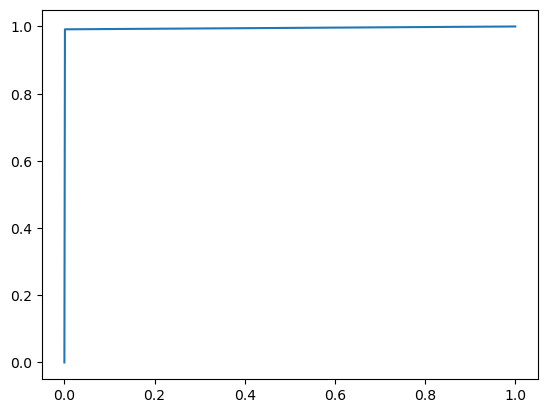

In [25]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr)
plt.show()

## Binary assignment result

In [26]:
X_train.columns

Index(['protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes',
       'logged_in', 'count', 'serror_rate', 'srv_error_rate', 'rerror_rate',
       'same_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate'],
      dtype='object')

In [27]:
select_cols

Index(['protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes',
       'logged_in', 'count', 'serror_rate', 'srv_error_rate', 'rerror_rate',
       'same_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate'],
      dtype='object')

In [28]:
import pickle
pickle.dump(logreg, open('logreg_all_features.pkl', 'wb'))
pickle.dump(logreg_SF, open('logreg_selected_features.pkl', 'wb'))

## Multinomial Regression

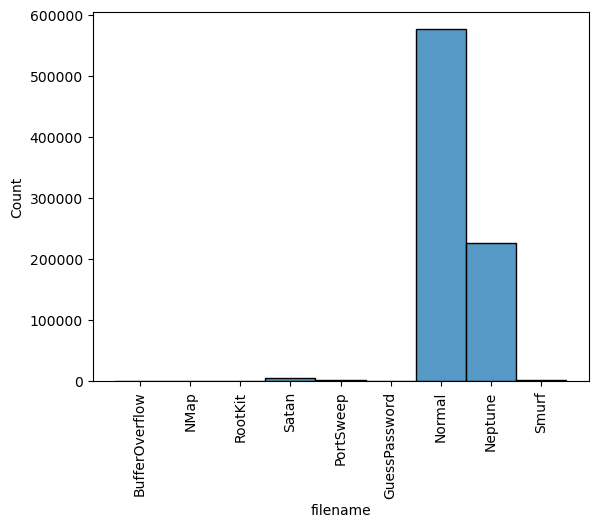

filename
Normal            576710
Neptune           227228
Satan               5019
Smurf               3007
PortSweep           2964
NMap                1554
GuessPassword         53
BufferOverflow        30
RootKit               10
Name: count, dtype: int64

In [29]:
## model_data
sns.histplot(data = model_data, x='filename')
plt.xticks(rotation=90)
plt.show()
model_data['filename'].value_counts(dropna=False)

In [30]:
formats_of_attack = model_data['filename'].unique()
formats_of_attack[formats_of_attack != 'Normal']
formats_of_attack

array(['BufferOverflow', 'NMap', 'RootKit', 'Satan', 'PortSweep',
       'GuessPassword', 'Normal', 'Neptune', 'Smurf'], dtype=object)

In [31]:
## downsampling per class
normal = model_data[model_data['filename']=="Normal"]
modes_dict = {}
for forms in formats_of_attack:
    attacks = model_data[model_data['filename'] == forms]
    len_attack = len(attacks)
    normal_sampled = normal.sample(n=len_attack, replace=True, random_state=0)
    df = pd.concat([attacks, normal_sampled], axis=0)
    modes_dict[forms] = df.sample(frac=1, random_state=0).reset_index(drop=True)
modes_dict['NMap']
##modes_new = pd.concat(modes_dict, axis=0).reset_index()

,index,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_error_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,filename,is_attack
0,1317,0.0,0.02,0.06,0.0,0.00008,0.00000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.001,0.049,0.0,0.0,0.0,0.0,0.1,0.0,0.100,0.003,0.255,0.100,0.000,0.100,0.025,0.000,0.0,0.000,0.000,NMap,1
1,283,0.0,0.00,0.12,0.1,0.00000,0.00000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.001,0.001,0.1,0.1,0.0,0.0,0.1,0.0,0.000,0.255,0.001,0.000,0.096,0.098,0.000,0.098,0.1,0.000,0.000,NMap,1
2,84386,0.0,0.01,0.02,0.0,0.00042,0.00103,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.048,0.048,0.0,0.0,0.0,0.0,0.1,0.0,0.000,0.209,0.188,0.090,0.001,0.000,0.000,0.000,0.0,0.000,0.000,Normal,0
3,1480,0.0,0.02,0.06,0.0,0.00008,0.00000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.001,0.030,0.0,0.0,0.0,0.0,0.1,0.0,0.100,0.001,0.105,0.100,0.000,0.100,0.026,0.000,0.0,0.000,0.000,NMap,1
4,600,0.0,0.02,0.06,0.0,0.00008,0.00000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.001,0.024,0.0,0.0,0.0,0.0,0.1,0.0,0.100,0.004,0.012,0.100,0.000,0.100,0.025,0.000,0.0,0.000,0.000,NMap,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3103,793,0.0,0.02,0.06,0.0,0.00008,0.00000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.001,0.026,0.0,0.0,0.0,0.0,0.1,0.0,0.100,0.001,0.205,0.100,0.000,0.100,0.025,0.000,0.0,0.000,0.000,NMap,1
3104,865,0.0,0.02,0.06,0.0,0.00008,0.00000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.001,0.007,0.0,0.0,0.0,0.0,0.1,0.0,0.100,0.004,0.061,0.100,0.000,0.100,0.026,0.000,0.0,0.000,0.000,NMap,1
3105,459202,0.0,0.00,0.01,0.0,0.01344,0.00332,0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.001,0.001,0.0,0.0,0.0,0.0,0.1,0.0,0.000,0.145,0.092,0.063,0.004,0.001,0.000,0.000,0.0,0.000,0.000,Normal,0
3106,581617,0.0,0.00,0.00,0.0,0.00305,0.00260,0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.003,0.003,0.0,0.0,0.0,0.0,0.1,0.0,0.000,0.255,0.249,0.098,0.001,0.000,0.000,0.000,0.0,0.004,0.004,Normal,0


## Methods of dealing with unbalanced data
- Downsampling
- Upsampling
- SMOTE synthetic minority oversampling technique

In [32]:
from imblearn.over_sampling import SMOTE

In [33]:
print(len(X_scaled),len(model_data),len(combined_df))

816575 816575 817543


In [34]:
attack_code={'Normal':0,'Neptune':1,'Satan':2,'Smurf':3,'PortSweep':4,'NMap':5,'GuessPassword':6,'BufferOverflow':7,'RootKit':8}
model_data['attack'] = model_data['filename'].map(attack_code)
model_data['attack'].value_counts(dropna=False)

attack
0    576710
1    227228
2      5019
3      3007
4      2964
5      1554
6        53
7        30
8        10
Name: count, dtype: int64

In [35]:
undersample_to = len(model_data[model_data['filename'] == "Neptune"])
normal = model_data[model_data['filename']=="Normal"]
model_normal_undersample = normal.sample(n=undersample_to, replace=True, random_state=0).reset_index()
df_noNormal = model_data[model_data['filename'] != "Normal"]
new_df = pd.concat([model_normal_undersample, df_noNormal], axis=0)
new_df['filename'].value_counts(dropna=False)

filename
Normal            227228
Neptune           227228
Satan               5019
Smurf               3007
PortSweep           2964
NMap                1554
GuessPassword         53
BufferOverflow        30
RootKit               10
Name: count, dtype: int64

In [36]:
## scaled data from above: X_scaled, 
y_label2 = new_df['attack']

X2 = new_df.drop(columns=['is_attack','level_0','index', 'attack', 'filename'])
X2.shape

y_label2.value_counts(dropna=False)

attack
0    227228
1    227228
2      5019
3      3007
4      2964
5      1554
6        53
7        30
8        10
Name: count, dtype: int64

In [37]:
## SMOTE only the train data after downsampling the normal data
## SMOTE does not work with string data

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X2, y_label2, test_size=0.2, random_state=0)
## smote_dict = {0:0.5,1:1,2:10,3:10,4:100,5:100,6:1000,7:1000,8:1000}
smote = SMOTE(k_neighbors=3,random_state=13)
smote_X, smote_y = smote.fit_resample(X_train, y_train)

In [39]:
smote_y.value_counts(dropna=False)

attack
0    182038
1    182038
4    182038
3    182038
5    182038
2    182038
6    182038
7    182038
8    182038
Name: count, dtype: int64

In [40]:
ss2 = StandardScaler()
scaler_fn2 = ss2.fit(smote_X)
Xsmote_train_scaled = scaler_fn2.transform(smote_X)
X_test_scaled = scaler_fn2.transform(X_test)

In [41]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(Xsmote_train_scaled, smote_y)

RandomForestClassifier()

In [42]:
y_pred = rfc.predict(X_test_scaled)

In [43]:
reverse_label_map = {v: k for k, v in attack_code.items()}
target_names = [reverse_label_map[i] for i in range(8)] ## chat-gpt
## target_names = list(attack_code.keys())
print(classification_report(y_test, y_pred,target_names=target_names))


                precision    recall  f1-score   support

        Normal       1.00      1.00      1.00     45595
       Neptune       1.00      1.00      1.00     45190
         Satan       1.00      1.00      1.00      1044
         Smurf       1.00      0.99      1.00       641
     PortSweep       1.00      1.00      1.00       624
          NMap       1.00      1.00      1.00       304
 GuessPassword       1.00      1.00      1.00        13
BufferOverflow       1.00      0.88      0.93         8

      accuracy                           1.00     93419
     macro avg       1.00      0.98      0.99     93419
  weighted avg       1.00      1.00      1.00     93419



In [44]:
class_labels = list(attack_code.values())
target_names = [reverse_label_map[i] for i in class_labels]
confusion_m = confusion_matrix(y_test, y_pred, labels=class_labels)
display(pd.DataFrame(confusion_m, index=target_names, columns=target_names))

,Normal,Neptune,Satan,Smurf,PortSweep,NMap,GuessPassword,BufferOverflow,RootKit
Normal,45595,0,0,0,0,0,0,0,0
Neptune,0,45189,0,0,1,0,0,0,0
Satan,5,0,1039,0,0,0,0,0,0
Smurf,4,0,0,637,0,0,0,0,0
PortSweep,1,0,1,0,622,0,0,0,0
NMap,0,0,1,0,0,303,0,0,0
GuessPassword,0,0,0,0,0,0,13,0,0
BufferOverflow,1,0,0,0,0,0,0,7,0
RootKit,0,0,0,0,0,0,0,0,0


In [45]:
smote_X.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_error_rate',
       'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate'],
      dtype='object')

In [46]:
# Predictions!
# pickle.dump(logreg_SF, open('logreg_selected_features.pkl', 'wb'))
pickle.dump(rfc, open('rfc_downsampledNormal_thenSMOT.pkl', 'wb'))
pickle.dump(scaler_fn, open('scaler_for_logreg_SF.pkl', 'wb'))
pickle.dump(scaler_fn2, open('scaler_for_rfc.pkl', 'wb'))

In [47]:
assignment_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_error_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,filename
586340,0.0,0.0,0.0,0.0,0.5454,0.08314,0,0.0,0.0,0.2,0.0,0.1,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.001,0.002,0.0,0.0,0.0,0.050,0.1,0.0,0.100,0.001,0.001,0.1,0.0,0.100,0.0,0.0,0.0,0.0,0.0,test_case
586341,0.0,0.0,0.0,0.0,0.5454,0.08314,0,0.0,0.0,0.2,0.0,0.1,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.002,0.003,0.0,0.0,0.0,0.033,0.1,0.0,0.067,0.002,0.002,0.1,0.0,0.050,0.0,0.0,0.0,0.0,0.0,test_case
586342,0.0,0.0,0.0,0.0,0.5454,0.08314,0,0.0,0.0,0.2,0.0,0.1,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.003,0.004,0.0,0.0,0.0,0.025,0.1,0.0,0.050,0.003,0.003,0.1,0.0,0.033,0.0,0.0,0.0,0.0,0.0,test_case
586343,0.0,0.0,0.0,0.0,0.5454,0.08314,0,0.0,0.0,0.2,0.0,0.1,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.004,0.004,0.0,0.0,0.0,0.000,0.1,0.0,0.000,0.004,0.004,0.1,0.0,0.025,0.0,0.0,0.0,0.0,0.0,test_case
586344,0.0,0.0,0.0,0.0,0.5454,0.08314,0,0.0,0.0,0.2,0.0,0.1,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.004,0.004,0.0,0.0,0.0,0.000,0.1,0.0,0.000,0.005,0.005,0.1,0.0,0.020,0.0,0.0,0.0,0.0,0.0,test_case


In [49]:
assignment_data.columns
assignment_data.drop(columns=['filename'], inplace=True)

/var/folders/08/44mrbxkx5hb7gynz0sggvs080000gn/T/ipykernel_4238/1505730482.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [50]:
assignment_data_Scaled = scaler_fn.transform(assignment_data)
assignment_data_Scaled_df = pd.DataFrame(assignment_data_Scaled, columns=assignment_data.columns)

In [53]:
select_cols
X_assignment_ScaledSelectedFE = assignment_data_Scaled_df[select_cols]
y_res_lr = logreg_SF.predict(X_assignment_ScaledSelectedFE)
assignment_data['is_threat'] = y_res_lr
assignment_data['is_threat'].value_counts(dropna=False)

/var/folders/08/44mrbxkx5hb7gynz0sggvs080000gn/T/ipykernel_4238/3926466477.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


is_threat
0    966
1      2
Name: count, dtype: int64

In [55]:
assignment_data[assignment_data['is_threat']==1]
print(f'Neptune threat identified in following rows')

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_error_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,is_threat
587110,0.0014,0.0,0.0,0.08,0.4234,0.0146,0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.001,0.001,0.0,0.0,0.1,0.1,0.1,0.0,0.0,0.001,0.001,0.1,0.0,0.10,0.0,0.0,0.0,0.1,0.1,1
587111,0.0012,0.0,0.0,0.08,0.1314,0.0146,0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.002,0.002,0.0,0.0,0.1,0.1,0.1,0.0,0.0,0.002,0.002,0.1,0.0,0.05,0.0,0.0,0.0,0.1,0.1,1


## Binary threat identified

In [58]:
assignment_data[assignment_data['is_threat']==1]

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_error_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,is_threat
587110,0.0014,0.0,0.0,0.08,0.4234,0.0146,0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.001,0.001,0.0,0.0,0.1,0.1,0.1,0.0,0.0,0.001,0.001,0.1,0.0,0.10,0.0,0.0,0.0,0.1,0.1,1
587111,0.0012,0.0,0.0,0.08,0.1314,0.0146,0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.002,0.002,0.0,0.0,0.1,0.1,0.1,0.0,0.0,0.002,0.002,0.1,0.0,0.05,0.0,0.0,0.0,0.1,0.1,1


## Identification of multinomial threat

In [59]:
assignment_data_rfe = assignment_data.drop(columns = ['is_threat'])
X_assignment = scaler_fn2.transform(assignment_data_rfe)
y_res_rfc = rfc.predict(X_assignment)

In [61]:
assignment_data['threat_type'] = y_res_rfc
assignment_data['threat_type'].value_counts(dropna=False)

/var/folders/08/44mrbxkx5hb7gynz0sggvs080000gn/T/ipykernel_4238/4226946188.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


threat_type
0    968
Name: count, dtype: int64

__I could not identify any threats in the multinomial model..__  
Even the ones I identified in the binomial model are not here...  
Will try again with other models and gridsearch etc.
In the meanwhile this is my current approach